### Dispersion of Waves on a String
A wavepacket can be described as a sum of sinusoidal waves, each of a single frequency. These sinusoids evolve independently and this leads to evolution of the wavepacket.
Each sinusoid, and therefore the overall wavepacket, is a solution of the wave equation. In one dimension this is

$$\frac{\partial^2 \psi}{\partial x^2} = \frac{1}{c^2} \frac{\partial^2 \psi}{\partial t^2},$$

where $\psi$ is the wave's amplitude and $c$ is the phase speed of the individual components. Imposing the boundary condition that $\psi = 0$ at either end of the string ($x=0$ and $x=L$), and that it's initially at rest ($\frac{\partial \psi}{\partial t} = 0$), the solution must be of the form:

$$\psi(x,t) = \sum_{m=1} B_m sin \Big(\frac{m \pi x}{L} \Big) cos \Big( \frac{m \pi c t}{L} \Big),$$

a sum of standing waves. If the phase speed is a constant then the form of the wavepacket is preserved as it evolves, but if the speed is a function of the individual components' wavenumbers, the shape changes.

The components $B_m$ can be extracted by integrating the initial wavepacket, mulitplied by a sinusoid, over the length of the string and using the orthogonality properties of sines:

$$B_m = \frac{2}{L} \int_0^L \psi(x,0) sin \Big(\frac{m \pi x}{L}\Big) dx.$$

At later times, the wave can be reconstructed by summing the individual sinusoids.

<IPython.core.display.Javascript object>


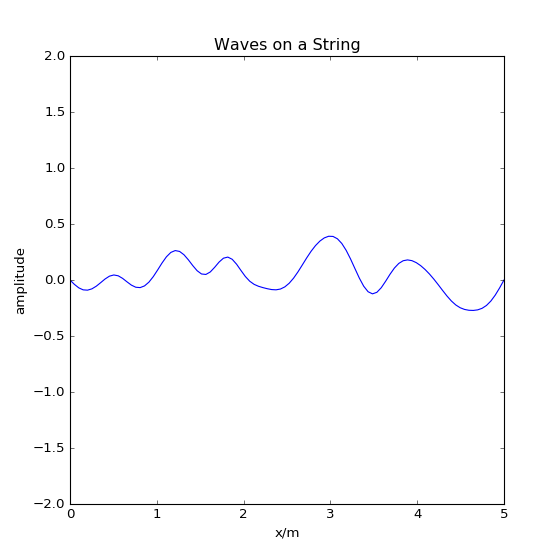

In [8]:
%matplotlib notebook
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib import animation

pi = np.pi
#length of string
L = 5.0
#phase speed
c = lambda k: 0.1*np.sqrt(1+0.2*k**2)
#number of x values
N = 100
x = np.linspace(0,L,N)

#analytic wavepacket at t=0, where d/dt = 0
wavepacket = lambda x: np.exp(-20*(x-0.3*L)**2)
temporal_cos = lambda t,m: np.cos(m*pi*c(m*pi/L)*t/L)
spatial_sin = lambda x,m: np.sin(m*pi*x/L)

#calculate the contributions from different standing waves
sinpacket = lambda x,m: wavepacket(x)*spatial_sin(x,m)
#number of harmonics to include
M = 100
#harmonic coefficients
B = [(2.0/L)*quad(sinpacket, 0, L, args = (m))[0] for m in range(1,M+1)]

t = np.linspace(0, 10, 100)
full_wave = np.zeros((t.shape[0], x.shape[0]))
for i in range(t.shape[0]):
    #reconstruct the wave from sinusoids
    for m in range(1,M+1):
        full_wave[i] += B[m-1]*spatial_sin(x,m)*temporal_cos(t[i],m)

#create and show animation
fig = plt.figure(figsize = (7,7))
ax = plt.axes(xlim=(0,L), ylim=(-2,2))
ax.set_xlabel("x/m")
ax.set_ylabel("amplitude")
ax.set_title("Waves on a String")
line, = ax.plot([],[])

def init():
    line.set_data(x,full_wave[0])
    return line

def animate(i):
    line.set_ydata(full_wave[i])
    return line

anim = animation.FuncAnimation(fig, animate, np.arange(0,t.shape[0]), init_func = init, blit = False, repeat = False)
plt.show()

Note that parts of the wavepacket appear to propagate along the string, but it's really just a sum of standing waves! If you want the animation to run more smoothly, use the pycav.display module.
### Investigation 
1. Why does the Gaussian wavepacket evolve as observed above, given the functional form of the phase speed?
2. Play around with the dispersion relation and initial wavepacket shape by changing the functions `c` and `wavepacket`, respectively.
3. The general form of the solution to the wave equation is 
$$\psi(x,t) = \sum_{m=1} \Big[ A_m cos \Big(\frac{m \pi x}{L} \Big) + B_m sin \Big(\frac{m \pi x}{L} \Big) \Big] \Big[ C_m cos \Big( \frac{m \pi c t}{L} \Big) + D_m cos \Big( \frac{m \pi c t}{L} \Big) \Big].$$
For surface waves on water in a long tank, the boundary conditions are $\frac{\partial \psi}{\partial x} = 0$ at either end of the tank and some initial condition (e.g. $\frac{\partial \psi}{\partial t} = 0$ at $t=0$) . Simplify the general solution above to find one appropriate for the water waves.
4. By shamelessly plagiarising the above program, simulate the motion of these water waves. The dispersion relation for surface waves on deep water is $\omega = \sqrt{gk}$.